In [6]:
# Import required libraries
import pandas as pd
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
transactions = pd.read_csv("transactions.csv")

In [12]:
# Select numerical features for anomaly detection
features = transactions[["TransactionAmount", "TransactionDuration", "AccountBalance"]]

In [14]:
# Train an IForest model with n_estimators parameter
model = IForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(features)

IForest(behaviour='old', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=42, verbose=0)

In [18]:
# Add the anomaly scores to the dataset
transactions["Anomaly_Score"] = model.decision_function(features)

# Flag transactions as anomalies based on the model's prediction
transactions["Anomaly"] = (model.predict(features) == 1).astype(int)  # Convert boolean to integer

C:\Users\tejus\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
C:\Users\tejus\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [20]:
# Create a summary of anomalous transactions
anomalies_summary = transactions.loc[transactions["Anomaly"] == 1, ["TransactionID", "TransactionAmount", "TransactionDuration", "AccountBalance"]]


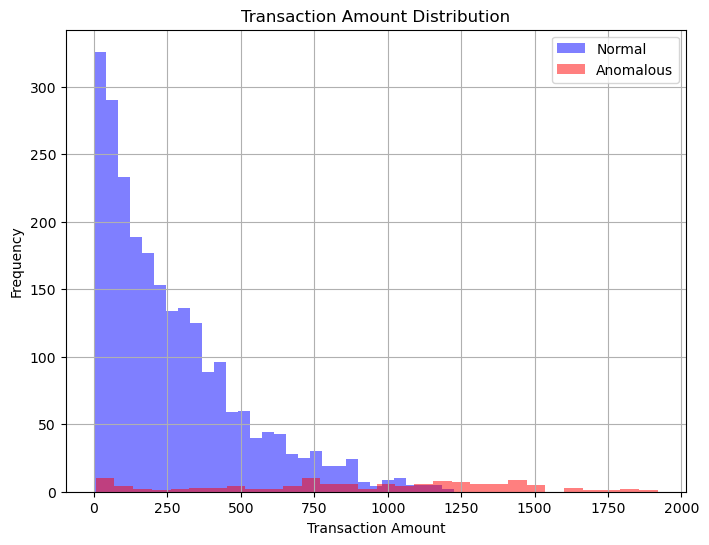

In [22]:
# Plot the distribution of TransactionAmount for normal and anomalous transactions
plt.figure(figsize=(8, 6))
transactions[transactions["Anomaly"] == False]["TransactionAmount"].hist(bins=30, alpha=0.5, label="Normal", color="blue")
transactions[transactions["Anomaly"] == True]["TransactionAmount"].hist(bins=30, alpha=0.5, label="Anomalous", color="red")
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("anomalies_histogram.png")